In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60) #导入人脸图像数据

In [4]:
faces.images.shape

(1348, 62, 47)

In [5]:
faces.data.shape

(1348, 2914)

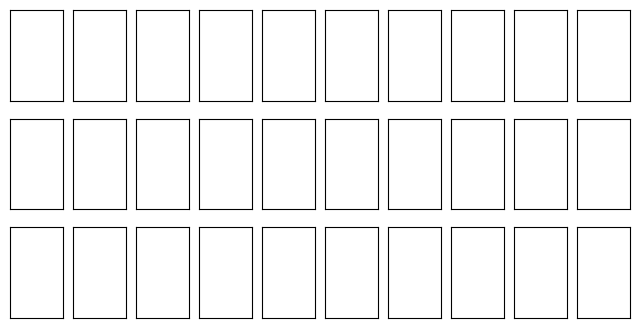

In [6]:
fig, axes = plt.subplots(nrows=3
                         , ncols=10
                         , figsize=(8,4)
                         , subplot_kw={"xticks": [], "yticks": []}
                         )

In [7]:
axes #图片的数据

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [8]:
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:] 
             ,cmap="gray")

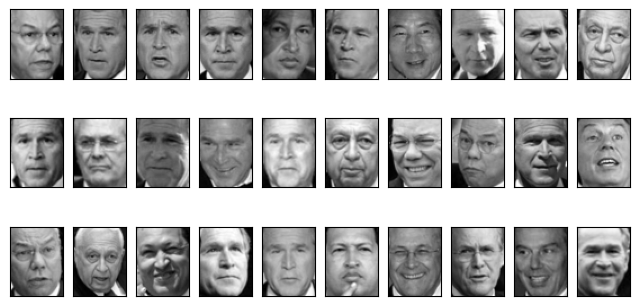

In [9]:
fig

In [10]:
X=faces.data

In [11]:
pca = PCA(n_components=0.95,svd_solver="full")

In [12]:
pca.fit(X)

PCA(n_components=0.95, svd_solver='full')

In [13]:
v = pca.components_

In [14]:
v.shape

(184, 2914)

In [23]:
v

array([[-0.00782034, -0.00832225, -0.00888709, ..., -0.01380322,
        -0.01246772, -0.01100734],
       [ 0.01708296,  0.01613268,  0.01591705, ..., -0.03533472,
        -0.03474693, -0.03335286],
       [-0.02085677, -0.01920225, -0.01839497, ..., -0.03719495,
        -0.03306055, -0.03066176],
       ...,
       [ 0.03203745,  0.01538004,  0.01462758, ..., -0.02661986,
         0.04572596,  0.09489226],
       [-0.01820464, -0.03495143, -0.06192866, ...,  0.03862635,
         0.00664089, -0.00096463],
       [ 0.03111686,  0.01710669,  0.01809624, ...,  0.05363817,
         0.00247868, -0.01121019]], dtype=float32)

In [15]:
for i, ax in enumerate(axes.flat):
    ax.imshow(v[i,:].reshape(62,47),cmap="gray") #这些就是选出来的特征，我佛了

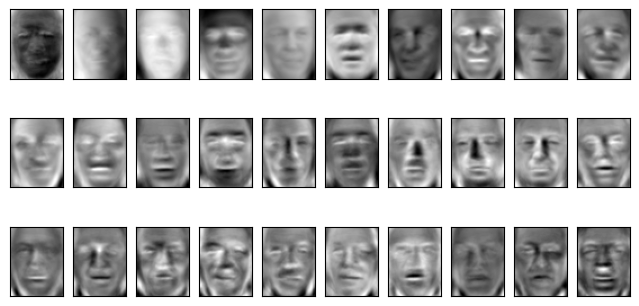

In [16]:
fig

In [25]:
x_dr = pca.transform(X)
x_dr

array([[ 4.24724531e+00,  2.59802485e+00,  2.28449941e+00, ...,
        -1.61339983e-01, -1.37373671e-01, -8.88746306e-02],
       [ 2.30693269e+00, -2.50346184e+00,  1.67106676e+00, ...,
        -1.88859090e-01, -4.57935035e-04, -5.03542647e-03],
       [ 1.07767209e-01, -1.04532003e+00,  1.14116859e+00, ...,
         2.34960824e-01, -1.45800501e-01, -4.30292264e-02],
       ...,
       [-2.59696245e+00, -2.83202291e+00,  6.35969818e-01, ...,
        -9.49185193e-02,  3.43842924e-01, -1.19728945e-01],
       [-4.57143593e+00, -2.09281254e+00,  1.88715923e+00, ...,
        -2.74006248e-01, -2.77291209e-01,  8.45458061e-02],
       [ 1.59292126e+00, -3.47075582e-01,  1.45256448e+00, ...,
         2.37419084e-01,  1.04871117e-01, -6.39791340e-02]], dtype=float32)

In [36]:
x_inverse = pca.inverse_transform(x_dr)
x_inverse.shape

(1348, 2914)

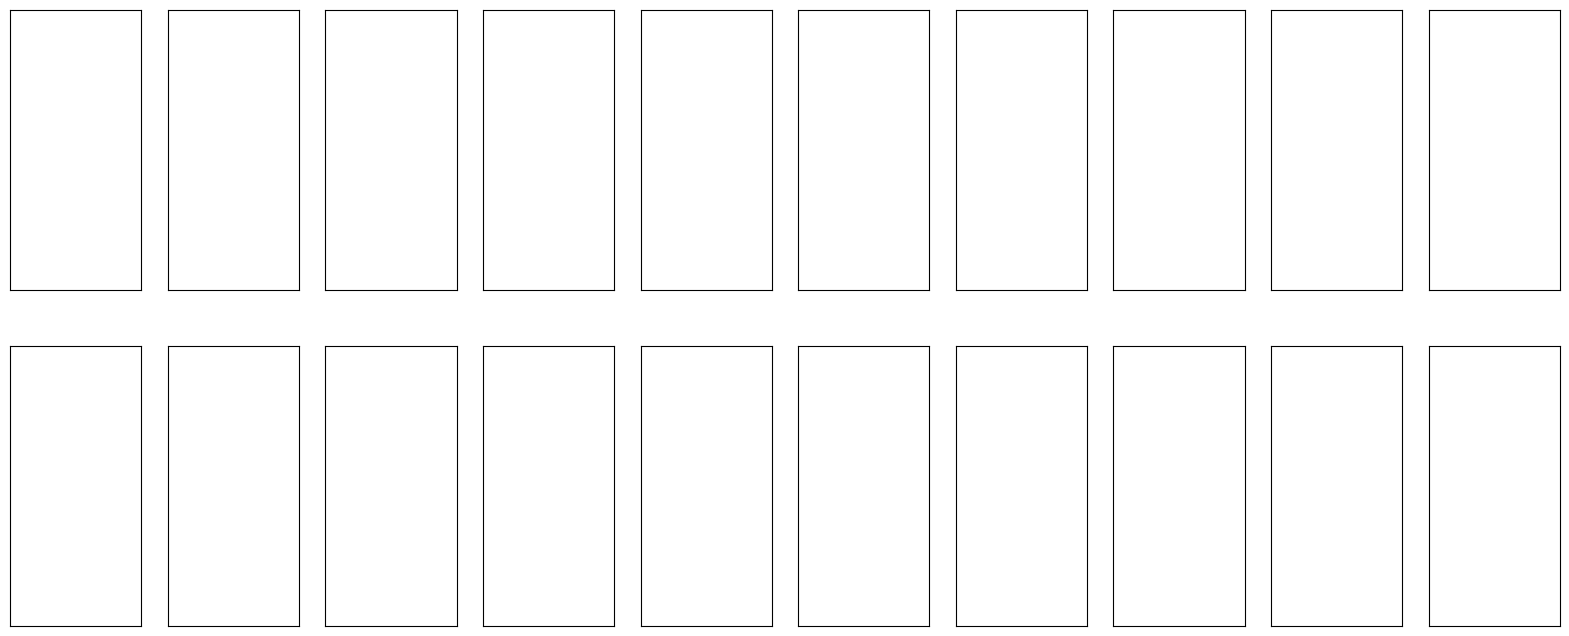

In [34]:
fig2,axie2 = plt.subplots(nrows=2
                         , ncols=10
                         , figsize=(20,8)
                         , subplot_kw={"xticks": [], "yticks": []}
                         )

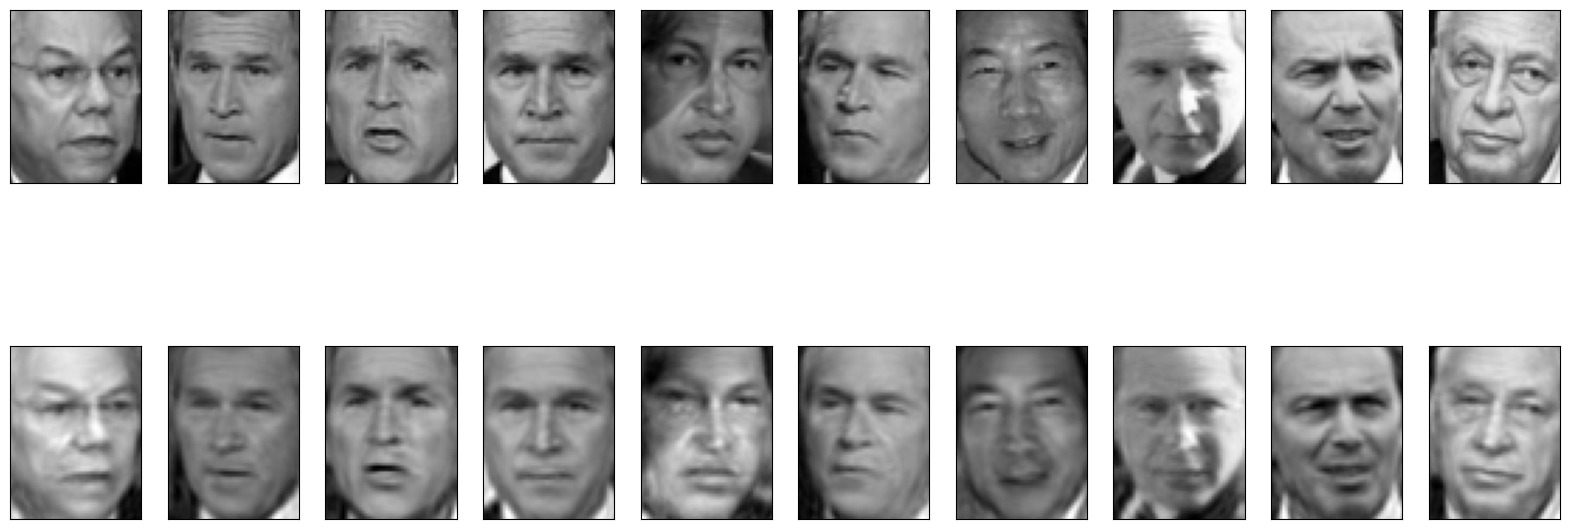

In [42]:
for i in range(10):
    axie2[0,i].imshow(faces.images[i,:,:],cmap="gray")
    axie2[1,i].imshow(x_inverse[i,:].reshape(62,47),cmap="gray")

fig2